Data Pre-processing

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [4]:
data = pd.read_csv("C:/Users/lenovo/Desktop/DESK/UVT-Hackathon/tabular_data.csv")

In [5]:
data.head()

,Case ID,Patient affiliation,Age at Histological Diagnosis,Weight (lbs),Gender,Ethnicity,Smoking status,Pack Years,Quit Smoking Year,%GG,...,Recurrence,Recurrence Location,Date of Recurrence,Date of Last Known Alive,Survival Status,Date of Death,Time to Death (days),CT Date,Days between CT and surgery,PET Date
0,AMC-001,Stanford,34,Not Collected,Male,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,yes,distant,10/7/1994,1/7/1997,Dead,1/7/1997,872.0,8/10/1994,9,Not Collected
1,AMC-002,Stanford,33,Not Collected,Female,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,no,NaN,NaN,3/20/1992,Alive,NaN,NaN,2/19/1992,3,Not Collected
2,AMC-003,Stanford,69,Not Collected,Female,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,no,NaN,NaN,6/19/1996,Alive,NaN,NaN,2/23/1995,28,Not Collected
3,AMC-004,Stanford,80,Not Collected,Female,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,no,NaN,NaN,12/13/1996,Alive,NaN,NaN,12/26/1992,47,Not Collected
4,AMC-005,Stanford,76,Not Collected,Male,Not Recorded In Database,Former,30,1962.0,Not Assessed,...,yes,distant,1/4/1996,1/7/1997,Alive,NaN,NaN,7/21/1994,2,Not Collected


In [6]:
data.describe()

,Age at Histological Diagnosis,Quit Smoking Year,Time to Death (days),Days between CT and surgery
count,211.000000,108.000000,63.000000,211.000000
mean,67.962085,1974.064815,704.285714,50.142180
std,10.005640,15.310050,551.965533,62.411832
min,24.000000,1935.000000,6.000000,1.000000
25%,64.000000,1965.750000,283.000000,19.500000
50%,68.000000,1974.000000,600.000000,38.000000
75%,75.000000,1987.000000,1065.500000,65.500000
max,87.000000,1995.000000,2356.000000,735.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Case ID                                            211 non-null    object 
 1   Patient affiliation                                211 non-null    object 
 2   Age at Histological Diagnosis                      211 non-null    int64  
 3   Weight (lbs)                                       211 non-null    object 
 4   Gender                                             211 non-null    object 
 5   Ethnicity                                          211 non-null    object 
 6   Smoking status                                     211 non-null    object 
 7   Pack Years                                         163 non-null    object 
 8   Quit Smoking Year                                  108 non-null    float64
 9   %GG       

In [8]:
data.nunique()

Case ID                                              211
Patient affiliation                                    2
Age at Histological Diagnosis                         45
Weight (lbs)                                         102
Gender                                                 2
Ethnicity                                              6
Smoking status                                         3
Pack Years                                            48
Quit Smoking Year                                     45
%GG                                                    7
Tumor Location (choice=RUL)                            2
Tumor Location (choice=RML)                            2
Tumor Location (choice=RLL)                            2
Tumor Location (choice=LUL)                            2
Tumor Location (choice=LLL)                            2
Tumor Location (choice=L Lingula)                      2
Tumor Location (choice=Unknown)                        1
Histology                      

In [9]:
data.columns

Index(['Case ID', 'Patient affiliation', 'Age at Histological Diagnosis',
       'Weight (lbs)', 'Gender', 'Ethnicity', 'Smoking status', 'Pack Years',
       'Quit Smoking Year', '%GG', 'Tumor Location (choice=RUL)',
       'Tumor Location (choice=RML)', 'Tumor Location (choice=RLL)',
       'Tumor Location (choice=LUL)', 'Tumor Location (choice=LLL)',
       'Tumor Location (choice=L Lingula)', 'Tumor Location (choice=Unknown)',
       'Histology ', 'Pathological T stage', 'Pathological N stage',
       'Pathological M stage', 'Histopathological Grade',
       'Lymphovascular invasion',
       'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Recurrence', 'Recurrence Location', 'Date of Recurrence',
       'Date of Last Known Alive', 'Survival Status', 'Date of Death',
       'Time to Death (days)', 'CT Date', 'Days between CT and sur

In [10]:
data["Survival Status"].value_counts()

Alive    148
Dead      63
Name: Survival Status, dtype: int64

In [11]:
def showcase_unique_values(data):
    for column in data.columns:
        print(f"Unique values in '{column}':")
        print(data[column].unique())
        print()

In [12]:
showcase_unique_values(data)

Unique values in 'Case ID':
['AMC-001' 'AMC-002' 'AMC-003' 'AMC-004' 'AMC-005' 'AMC-006' 'AMC-007'
 'AMC-008' 'AMC-009' 'AMC-010' 'AMC-011' 'AMC-012' 'AMC-013' 'AMC-014'
 'AMC-015' 'AMC-016' 'AMC-017' 'AMC-018' 'AMC-019' 'AMC-020' 'AMC-021'
 'AMC-022' 'AMC-023' 'AMC-024' 'AMC-025' 'AMC-026' 'AMC-027' 'AMC-028'
 'AMC-029' 'AMC-030' 'AMC-031' 'AMC-032' 'AMC-033' 'AMC-034' 'AMC-035'
 'AMC-036' 'AMC-037' 'AMC-038' 'AMC-039' 'AMC-040' 'AMC-041' 'AMC-042'
 'AMC-043' 'AMC-044' 'AMC-045' 'AMC-046' 'AMC-047' 'AMC-048' 'AMC-049'
 'R01-001' 'R01-002' 'R01-003' 'R01-004' 'R01-005' 'R01-006' 'R01-007'
 'R01-008' 'R01-009' 'R01-010' 'R01-011' 'R01-012' 'R01-013' 'R01-014'
 'R01-015' 'R01-016' 'R01-017' 'R01-018' 'R01-019' 'R01-020' 'R01-021'
 'R01-022' 'R01-023' 'R01-024' 'R01-025' 'R01-026' 'R01-027' 'R01-028'
 'R01-029' 'R01-030' 'R01-031' 'R01-032' 'R01-033' 'R01-034' 'R01-035'
 'R01-036' 'R01-037' 'R01-038' 'R01-039' 'R01-040' 'R01-041' 'R01-042'
 'R01-043' 'R01-044' 'R01-045' 'R01-046' 'R01-047

In [13]:
y = data['Survival Status']

In [14]:
y = data['Survival Status'].map({'Alive': 1, 'Dead': 0})

In [15]:
y

0      0
1      1
2      1
3      1
4      1
      ..
206    1
207    1
208    1
209    0
210    0
Name: Survival Status, Length: 211, dtype: int64

feature engineering

In [16]:
columns_to_drop = ['Case ID', 'Patient affiliation',
                   "Tumor Location (choice=RUL)", "Tumor Location (choice=RML)",
                   "Tumor Location (choice=RLL)", "Tumor Location (choice=LUL)",
                   "Tumor Location (choice=LLL)", "Tumor Location (choice=L Lingula)",
                   "Tumor Location (choice=Unknown)", "Date of Last Known Alive",
                   "Date of Death", "CT Date", "PET Date", "Date of Recurrence",
                   "Time to Death (days)"]

for i in columns_to_drop:
  print(i)
  data = data.drop(i, axis=1, errors='ignore')

Case ID
Patient affiliation
Tumor Location (choice=RUL)
Tumor Location (choice=RML)
Tumor Location (choice=RLL)
Tumor Location (choice=LUL)
Tumor Location (choice=LLL)
Tumor Location (choice=L Lingula)
Tumor Location (choice=Unknown)
Date of Last Known Alive
Date of Death
CT Date
PET Date
Date of Recurrence
Time to Death (days)


In [17]:
data.columns

Index(['Age at Histological Diagnosis', 'Weight (lbs)', 'Gender', 'Ethnicity',
       'Smoking status', 'Pack Years', 'Quit Smoking Year', '%GG',
       'Histology ', 'Pathological T stage', 'Pathological N stage',
       'Pathological M stage', 'Histopathological Grade',
       'Lymphovascular invasion',
       'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Recurrence', 'Recurrence Location', 'Survival Status',
       'Days between CT and surgery'],
      dtype='object')

Age and Weight Distributions

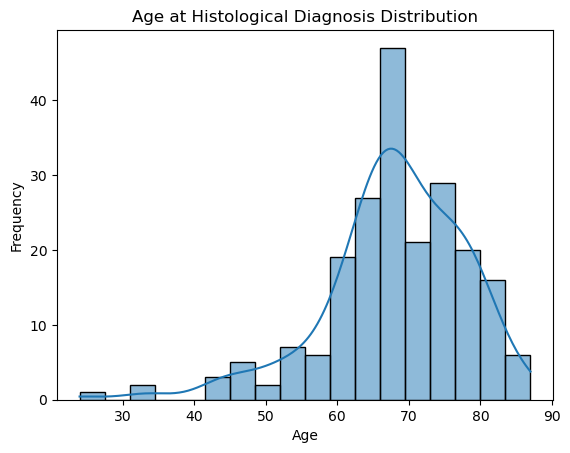

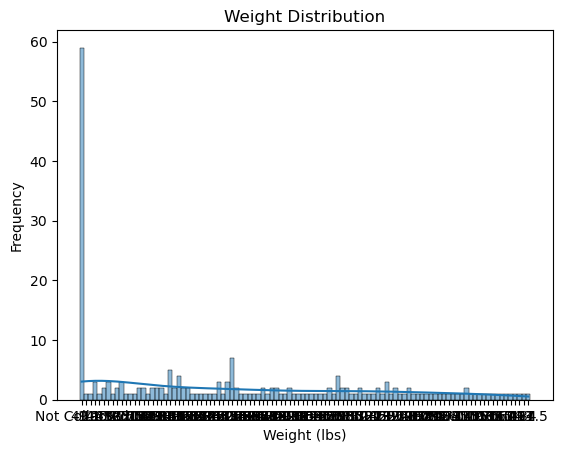

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Age at Histological Diagnosis'], kde=True)
plt.title("Age at Histological Diagnosis Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

sns.histplot(data['Weight (lbs)'], kde=True)
plt.title("Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Frequency")
plt.show()


gender proportions

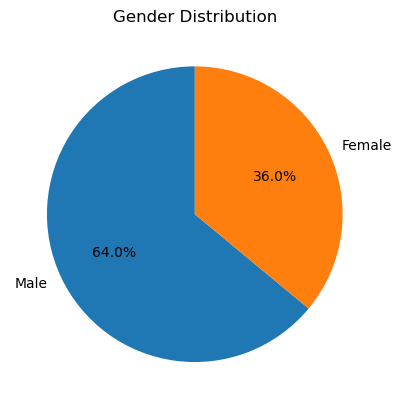

In [19]:
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, title="Gender Distribution")
plt.ylabel('')
plt.show()

smoking status vs pack years

In [76]:
'''sns.boxplot(x='Smoking status', y='Pack Years', data=data)
plt.title("Pack Years by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Pack Years")
plt.show()'''


'sns.boxplot(x=\'Smoking status\', y=\'Pack Years\', data=data)\nplt.title("Pack Years by Smoking Status")\nplt.xlabel("Smoking Status")\nplt.ylabel("Pack Years")\nplt.show()'

smoking status over time

In [ ]:
sns.scatterplot(x='Quit Smoking Year', y='Pack Years', hue='Smoking status', data=data)
plt.title("Smoking History (Years vs. Pack Years)")
plt.xlabel("Quit Smoking Year")
plt.ylabel("Pack Years")
plt.show()

pathological stages

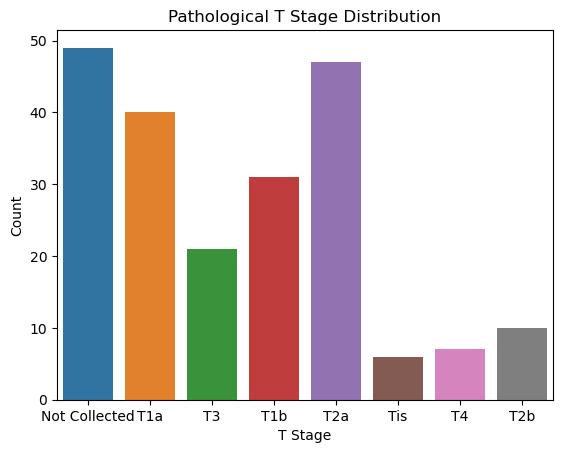

In [21]:
# Pathological T Stage
sns.countplot(x='Pathological T stage', data=data)
plt.title("Pathological T Stage Distribution")
plt.xlabel("T Stage")
plt.ylabel("Count")
plt.show()

mutation status heatmap

In [75]:
mutation_data = data[['EGFR mutation status', 'KRAS mutation status', 'ALK translocation status']].applymap(lambda x: 1 if x == 'Positive' else 0)
sns.heatmap(mutation_data, cmap='Blues', cbar=False)
plt.title("Mutation Status Heatmap")
plt.xlabel("Mutation Type")
plt.show()


'mutation_data = data[[\'EGFR mutation status\', \'KRAS mutation status\', \'ALK translocation status\']].applymap(lambda x: 1 if x == \'Positive\' else 0)\nsns.heatmap(mutation_data, cmap=\'Blues\', cbar=False)\nplt.title("Mutation Status Heatmap")\nplt.xlabel("Mutation Type")\nplt.show()'

Survival Status by Treatment

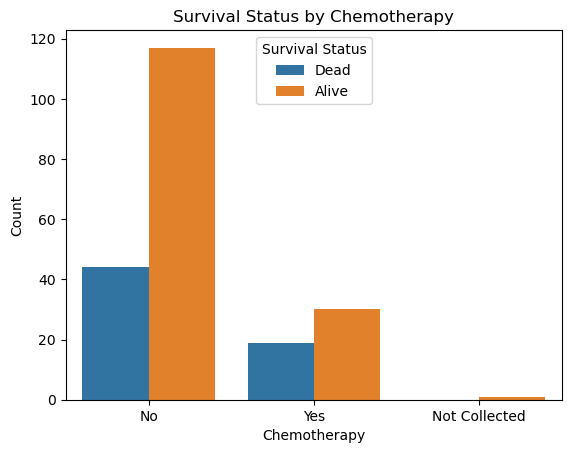

In [23]:
sns.countplot(x='Chemotherapy', hue='Survival Status', data=data)
plt.title("Survival Status by Chemotherapy")
plt.xlabel("Chemotherapy")
plt.ylabel("Count")
plt.show()


Time to Death and Days between CT and Surgery

In [74]:
sns.kdeplot(data['Time to Death (days)'], fill=True)
plt.title("Time to Death (days) Distribution")
plt.xlabel("Time to Death (days)")
plt.show()

#correlation between CT-surgery days and survival time
sns.scatterplot(x='Days between CT and surgery', y='Time to Death (days)', hue='Survival Status', data=data)
plt.title("Days between CT and Surgery vs. Time to Death")
plt.xlabel("Days between CT and Surgery")
plt.ylabel("Time to Death (days)")
plt.show()

'sns.kdeplot(data[\'Time to Death (days)\'], fill=True)\nplt.title("Time to Death (days) Distribution")\nplt.xlabel("Time to Death (days)")\nplt.show()\n\n#correlation between CT-surgery days and survival time\nsns.scatterplot(x=\'Days between CT and surgery\', y=\'Time to Death (days)\', hue=\'Survival Status\', data=data)\nplt.title("Days between CT and Surgery vs. Time to Death")\nplt.xlabel("Days between CT and Surgery")\nplt.ylabel("Time to Death (days)")\nplt.show()'

Feature Correlation Matrix

In [25]:
lt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()


'plt.figure(figsize=(10, 8))\nsns.heatmap(data.corr(), annot=True, cmap=\'coolwarm\', fmt=\'.2f\')\nplt.title("Correlation Matrix of Features")\nplt.show()'

handling missing values in non numerical values: imputation

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

In [27]:
import pandas as pd
import random

def handle_missing_values(data, column_name, missing_value, strategy="mode"):
    missing_indices = data[column_name] == missing_value

    if strategy == "mode":
        mode_value = data[column_name].mode()[0]
        data.loc[missing_indices, column_name] = mode_value

    elif strategy == "random":
        non_missing_values = data.loc[~missing_indices, column_name].dropna().unique()
        data.loc[missing_indices, column_name] = [
            random.choice(non_missing_values) for _ in range(missing_indices.sum())
        ]

    elif strategy == "new_category":
        data.loc[missing_indices, column_name] = "Unknown"

    else:
        raise ValueError("Invalid strategy! Choose from 'mode', 'random', or 'new_category'.")

    return data



In [28]:
handle_missing_values(data, 'Ethnicity', 'Not Recorded In Database', strategy="mode")

,Age at Histological Diagnosis,Weight (lbs),Gender,Ethnicity,Smoking status,Pack Years,Quit Smoking Year,%GG,Histology,Pathological T stage,...,EGFR mutation status,KRAS mutation status,ALK translocation status,Adjuvant Treatment,Chemotherapy,Radiation,Recurrence,Recurrence Location,Survival Status,Days between CT and surgery
0,34,Not Collected,Male,Caucasian,Nonsmoker,NaN,NaN,Not Assessed,Adenocarcinoma,Not Collected,...,Wildtype,Mutant,Wildtype,No,No,No,yes,distant,Dead,9
1,33,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,Not Assessed,Adenocarcinoma,Not Collected,...,Wildtype,Wildtype,Not collected,No,No,No,no,NaN,Alive,3
2,69,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,Not Assessed,Adenocarcinoma,Not Collected,...,Mutant,Wildtype,Wildtype,No,No,No,no,NaN,Alive,28
3,80,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,Not Assessed,Adenocarcinoma,Not Collected,...,Wildtype,Wildtype,Wildtype,No,No,No,no,NaN,Alive,47
4,76,Not Collected,Male,Caucasian,Former,30,1962.0,Not Assessed,Adenocarcinoma,Not Collected,...,Mutant,Wildtype,Wildtype,No,No,No,yes,distant,Alive,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,75,184,Male,Caucasian,Former,55,1994.0,Not Assessed,Squamous cell carcinoma,T2a,...,Unknown,Unknown,Unknown,No,No,No,no,NaN,Alive,14
207,61,231.5,Male,Caucasian,Former,12,1993.0,Not Assessed,Adenocarcinoma,T3,...,Unknown,Mutant,Unknown,Yes,Yes,No,no,NaN,Alive,72
208,52,Not Collected,Female,Caucasian,Former,7,NaN,Not Assessed,Adenocarcinoma,T2a,...,Wildtype,Wildtype,Wildtype,No,No,No,no,NaN,Alive,8
209,67,158,Male,Asian,Former,15,1966.0,Not Assessed,Adenocarcinoma,T2a,...,Mutant,Wildtype,Wildtype,No,No,No,no,NaN,Dead,65


In [29]:
handle_missing_values(data, '%GG', 'Not Assessed', strategy="mode")

,Age at Histological Diagnosis,Weight (lbs),Gender,Ethnicity,Smoking status,Pack Years,Quit Smoking Year,%GG,Histology,Pathological T stage,...,EGFR mutation status,KRAS mutation status,ALK translocation status,Adjuvant Treatment,Chemotherapy,Radiation,Recurrence,Recurrence Location,Survival Status,Days between CT and surgery
0,34,Not Collected,Male,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,Not Collected,...,Wildtype,Mutant,Wildtype,No,No,No,yes,distant,Dead,9
1,33,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,Not Collected,...,Wildtype,Wildtype,Not collected,No,No,No,no,NaN,Alive,3
2,69,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,Not Collected,...,Mutant,Wildtype,Wildtype,No,No,No,no,NaN,Alive,28
3,80,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,Not Collected,...,Wildtype,Wildtype,Wildtype,No,No,No,no,NaN,Alive,47
4,76,Not Collected,Male,Caucasian,Former,30,1962.0,0%,Adenocarcinoma,Not Collected,...,Mutant,Wildtype,Wildtype,No,No,No,yes,distant,Alive,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,75,184,Male,Caucasian,Former,55,1994.0,0%,Squamous cell carcinoma,T2a,...,Unknown,Unknown,Unknown,No,No,No,no,NaN,Alive,14
207,61,231.5,Male,Caucasian,Former,12,1993.0,0%,Adenocarcinoma,T3,...,Unknown,Mutant,Unknown,Yes,Yes,No,no,NaN,Alive,72
208,52,Not Collected,Female,Caucasian,Former,7,NaN,0%,Adenocarcinoma,T2a,...,Wildtype,Wildtype,Wildtype,No,No,No,no,NaN,Alive,8
209,67,158,Male,Asian,Former,15,1966.0,0%,Adenocarcinoma,T2a,...,Mutant,Wildtype,Wildtype,No,No,No,no,NaN,Dead,65


In [30]:
handle_missing_values(data, 'Pathological T stage', 'Not Collected', strategy="random")
handle_missing_values(data, 'Pathological N stage', 'Not Collected', strategy="random")
handle_missing_values(data, 'Pathological M stage', 'Not Collected', strategy="random")

,Age at Histological Diagnosis,Weight (lbs),Gender,Ethnicity,Smoking status,Pack Years,Quit Smoking Year,%GG,Histology,Pathological T stage,...,EGFR mutation status,KRAS mutation status,ALK translocation status,Adjuvant Treatment,Chemotherapy,Radiation,Recurrence,Recurrence Location,Survival Status,Days between CT and surgery
0,34,Not Collected,Male,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,T2a,...,Wildtype,Mutant,Wildtype,No,No,No,yes,distant,Dead,9
1,33,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,T3,...,Wildtype,Wildtype,Not collected,No,No,No,no,NaN,Alive,3
2,69,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,T2b,...,Mutant,Wildtype,Wildtype,No,No,No,no,NaN,Alive,28
3,80,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,Tis,...,Wildtype,Wildtype,Wildtype,No,No,No,no,NaN,Alive,47
4,76,Not Collected,Male,Caucasian,Former,30,1962.0,0%,Adenocarcinoma,T2a,...,Mutant,Wildtype,Wildtype,No,No,No,yes,distant,Alive,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,75,184,Male,Caucasian,Former,55,1994.0,0%,Squamous cell carcinoma,T2a,...,Unknown,Unknown,Unknown,No,No,No,no,NaN,Alive,14
207,61,231.5,Male,Caucasian,Former,12,1993.0,0%,Adenocarcinoma,T3,...,Unknown,Mutant,Unknown,Yes,Yes,No,no,NaN,Alive,72
208,52,Not Collected,Female,Caucasian,Former,7,NaN,0%,Adenocarcinoma,T2a,...,Wildtype,Wildtype,Wildtype,No,No,No,no,NaN,Alive,8
209,67,158,Male,Asian,Former,15,1966.0,0%,Adenocarcinoma,T2a,...,Mutant,Wildtype,Wildtype,No,No,No,no,NaN,Dead,65


In [31]:
handle_missing_values(data, 'Histopathological Grade', 'Not Collected', strategy="random")
handle_missing_values(data, 'Lymphovascular invasion', 'Not Collected', strategy="random")
handle_missing_values(data, 'Pleural invasion (elastic, visceral, or parietal)', 'Not Collected', strategy="random")

,Age at Histological Diagnosis,Weight (lbs),Gender,Ethnicity,Smoking status,Pack Years,Quit Smoking Year,%GG,Histology,Pathological T stage,...,EGFR mutation status,KRAS mutation status,ALK translocation status,Adjuvant Treatment,Chemotherapy,Radiation,Recurrence,Recurrence Location,Survival Status,Days between CT and surgery
0,34,Not Collected,Male,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,T2a,...,Wildtype,Mutant,Wildtype,No,No,No,yes,distant,Dead,9
1,33,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,T3,...,Wildtype,Wildtype,Not collected,No,No,No,no,NaN,Alive,3
2,69,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,T2b,...,Mutant,Wildtype,Wildtype,No,No,No,no,NaN,Alive,28
3,80,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,Tis,...,Wildtype,Wildtype,Wildtype,No,No,No,no,NaN,Alive,47
4,76,Not Collected,Male,Caucasian,Former,30,1962.0,0%,Adenocarcinoma,T2a,...,Mutant,Wildtype,Wildtype,No,No,No,yes,distant,Alive,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,75,184,Male,Caucasian,Former,55,1994.0,0%,Squamous cell carcinoma,T2a,...,Unknown,Unknown,Unknown,No,No,No,no,NaN,Alive,14
207,61,231.5,Male,Caucasian,Former,12,1993.0,0%,Adenocarcinoma,T3,...,Unknown,Mutant,Unknown,Yes,Yes,No,no,NaN,Alive,72
208,52,Not Collected,Female,Caucasian,Former,7,NaN,0%,Adenocarcinoma,T2a,...,Wildtype,Wildtype,Wildtype,No,No,No,no,NaN,Alive,8
209,67,158,Male,Asian,Former,15,1966.0,0%,Adenocarcinoma,T2a,...,Mutant,Wildtype,Wildtype,No,No,No,no,NaN,Dead,65


In [32]:
handle_missing_values(data, 'EGFR mutation status', 'Not Collected', strategy="mode")
handle_missing_values(data, 'KRAS mutation status', 'Not Collected', strategy="mode")
handle_missing_values(data, 'ALK translocation status', 'Not Collected', strategy="mode")
handle_missing_values(data, 'Chemotherapy', 'Not Collected', strategy="mode")
handle_missing_values(data, 'Radiation', 'Not Collected', strategy="mode")
handle_missing_values(data, 'Recurrence', 'Not Collected', strategy="mode")
handle_missing_values(data, 'KRAS mutation status', 'Not Collected', strategy="mode")
handle_missing_values(data, 'KRAS mutation status', 'Not Collected', strategy="mode")
handle_missing_values(data, 'Adjuvant Treatment', 'Not Collected', strategy="mode")

,Age at Histological Diagnosis,Weight (lbs),Gender,Ethnicity,Smoking status,Pack Years,Quit Smoking Year,%GG,Histology,Pathological T stage,...,EGFR mutation status,KRAS mutation status,ALK translocation status,Adjuvant Treatment,Chemotherapy,Radiation,Recurrence,Recurrence Location,Survival Status,Days between CT and surgery
0,34,Not Collected,Male,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,T2a,...,Wildtype,Mutant,Wildtype,No,No,No,yes,distant,Dead,9
1,33,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,T3,...,Wildtype,Wildtype,Not collected,No,No,No,no,NaN,Alive,3
2,69,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,T2b,...,Mutant,Wildtype,Wildtype,No,No,No,no,NaN,Alive,28
3,80,Not Collected,Female,Caucasian,Nonsmoker,NaN,NaN,0%,Adenocarcinoma,Tis,...,Wildtype,Wildtype,Wildtype,No,No,No,no,NaN,Alive,47
4,76,Not Collected,Male,Caucasian,Former,30,1962.0,0%,Adenocarcinoma,T2a,...,Mutant,Wildtype,Wildtype,No,No,No,yes,distant,Alive,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,75,184,Male,Caucasian,Former,55,1994.0,0%,Squamous cell carcinoma,T2a,...,Unknown,Unknown,Unknown,No,No,No,no,NaN,Alive,14
207,61,231.5,Male,Caucasian,Former,12,1993.0,0%,Adenocarcinoma,T3,...,Unknown,Mutant,Unknown,Yes,Yes,No,no,NaN,Alive,72
208,52,Not Collected,Female,Caucasian,Former,7,NaN,0%,Adenocarcinoma,T2a,...,Wildtype,Wildtype,Wildtype,No,No,No,no,NaN,Alive,8
209,67,158,Male,Asian,Former,15,1966.0,0%,Adenocarcinoma,T2a,...,Mutant,Wildtype,Wildtype,No,No,No,no,NaN,Dead,65


embeddings for non numerical values

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
def onehotEncoder(data, category_feature):
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = one_hot_encoder.fit_transform(data[[category_feature]])
    encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out([category_feature]))
    data = data.drop(category_feature, axis=1).join(encoded_df)
    return data

In [35]:
data.columns = data.columns.str.strip()

In [36]:
columns_to_encode = ['Gender', 'Smoking status', 'Ethnicity', '%GG', 'Histology',
                     'Pathological T stage', 'Pathological N stage',
                     'Pathological M stage', 'Histopathological Grade', 'Adjuvant Treatment',
                     'Lymphovascular invasion','Pleural invasion (elastic, visceral, or parietal)',
                     'EGFR mutation status', 'KRAS mutation status', 'ALK translocation status',
                     'Chemotherapy', 'Radiation', 'Recurrence', 'Recurrence Location', 'Survival Status']

for feature in columns_to_encode:
  if feature in data.columns:
        data = onehotEncoder(data, feature)
  else:
        print(f"Column '{feature}' not found in DataFrame.")



```
# This is formatted as code for numerical values in numerical values
```

handling missing values

In [37]:
for i in data.columns:
    data[i].fillna(data[i].mode()[0], inplace=True)   #most frequent value, mean, median

In [38]:
import pandas as pd

def impute_missing_numerical(data, column_name, missing_value, strategy="mean", fill_value=None):
    data[column_name] = pd.to_numeric(data[column_name].replace(missing_value, pd.NA), errors='coerce')

    if strategy == "mean":
        fill_value = data[column_name].mean()
    elif strategy == "median":
        fill_value = data[column_name].median()
    elif strategy == "constant":
        if fill_value is None:
            raise ValueError("Please provide a fill_value when using the 'constant' strategy.")
    else:
        raise ValueError("Invalid strategy! Choose from 'mean', 'median', or 'constant'.")
    data[column_name].fillna(fill_value, inplace=True)

    return data



In [39]:
impute_missing_numerical(data, 'Weight (lbs)', 'Not Collected', strategy="mean", fill_value=None)

,Age at Histological Diagnosis,Weight (lbs),Pack Years,Quit Smoking Year,Days between CT and surgery,Gender_Male,Smoking status_Former,Smoking status_Nonsmoker,Ethnicity_Asian,Ethnicity_Caucasian,...,ALK translocation status_Unknown,ALK translocation status_Wildtype,Chemotherapy_Yes,Radiation_Yes,Recurrence_no,Recurrence_yes,Recurrence Location_local,Recurrence Location_regional,Recurrence Location_nan,Survival Status_Dead
0,34,169.487003,50,1994.0,9,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33,169.487003,50,1994.0,3,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,69,169.487003,50,1994.0,28,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,80,169.487003,50,1994.0,47,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,76,169.487003,30,1962.0,2,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,75,184.000000,55,1994.0,14,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
207,61,231.500000,12,1993.0,72,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
208,52,169.487003,7,1994.0,8,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
209,67,158.000000,15,1966.0,65,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [40]:
impute_missing_numerical(data, 'Pack Years', 'Not Collected', strategy="mean", fill_value=None)

,Age at Histological Diagnosis,Weight (lbs),Pack Years,Quit Smoking Year,Days between CT and surgery,Gender_Male,Smoking status_Former,Smoking status_Nonsmoker,Ethnicity_Asian,Ethnicity_Caucasian,...,ALK translocation status_Unknown,ALK translocation status_Wildtype,Chemotherapy_Yes,Radiation_Yes,Recurrence_no,Recurrence_yes,Recurrence Location_local,Recurrence Location_regional,Recurrence Location_nan,Survival Status_Dead
0,34,169.487003,50.0,1994.0,9,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33,169.487003,50.0,1994.0,3,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,69,169.487003,50.0,1994.0,28,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,80,169.487003,50.0,1994.0,47,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,76,169.487003,30.0,1962.0,2,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,75,184.000000,55.0,1994.0,14,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
207,61,231.500000,12.0,1993.0,72,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
208,52,169.487003,7.0,1994.0,8,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
209,67,158.000000,15.0,1966.0,65,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [41]:
import pandas as pd
from datetime import datetime

def years_since_stopped_smoking(data, column_name):
    current_year = datetime.now().year

    data[f'years_since_{column_name}'] = current_year - pd.to_numeric(data[column_name], errors='coerce')

    return data


In [42]:
years_since_stopped_smoking(data, 'Quit Smoking Year')

,Age at Histological Diagnosis,Weight (lbs),Pack Years,Quit Smoking Year,Days between CT and surgery,Gender_Male,Smoking status_Former,Smoking status_Nonsmoker,Ethnicity_Asian,Ethnicity_Caucasian,...,ALK translocation status_Wildtype,Chemotherapy_Yes,Radiation_Yes,Recurrence_no,Recurrence_yes,Recurrence Location_local,Recurrence Location_regional,Recurrence Location_nan,Survival Status_Dead,years_since_Quit Smoking Year
0,34,169.487003,50.0,1994.0,9,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,30.0
1,33,169.487003,50.0,1994.0,3,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,30.0
2,69,169.487003,50.0,1994.0,28,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,30.0
3,80,169.487003,50.0,1994.0,47,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,30.0
4,76,169.487003,30.0,1962.0,2,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,75,184.000000,55.0,1994.0,14,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,30.0
207,61,231.500000,12.0,1993.0,72,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,31.0
208,52,169.487003,7.0,1994.0,8,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,30.0
209,67,158.000000,15.0,1966.0,65,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,58.0


In [43]:
data = data.drop('Quit Smoking Year', axis=1, errors='ignore')

In [44]:
showcase_unique_values(data)

Unique values in 'Age at Histological Diagnosis':
[34 33 69 80 76 56 65 61 42 66 70 67 78 58 68 77 64 74 52 79 24 45 60 72
 75 84 62 73 59 46 71 63 81 86 43 57 87 53 85 47 83 51 54 50 55]

Unique values in 'Weight (lbs)':
[169.48700263  49.1        146.         195.         145.
 102.         133.          90.         125.         176.
 130.         175.         205.         152.         149.
 169.         158.         152.145      189.63       249.165
 160.965      134.505      185.22       180.81       216.09
 317.52       187.425      198.45       211.68       288.855
 178.605      174.195      167.58       145.53       200.655
 127.89       202.86       220.5        156.555      209.475
 147.735      194.04       207.27       183.015      171.99
 224.91       148.02165    132.3        180.1926     199.04535
 103.635      111.5815     214.         114.66       154.35
 130.02885    128.         139.         201.         225.
 183.         135.         112.         132.         104.
 

In [45]:
new_column_names = {
    '%GG_100%': '%GG_100%',
    '%GG_0 - 25%': '%GG_0 - 25%',
    '%GG_25 - 50%': '%GG_25 - 50%',
    '%GG_50 - 75%':  '%GG_50 - 75%',
    '%GG_75 - 100%': '%GG_75 - 100%'

}

data = data.rename(columns=new_column_names)

info about data after cleaning

In [46]:
data.describe()

,Age at Histological Diagnosis,Weight (lbs),Pack Years,Days between CT and surgery,Gender_Male,Smoking status_Former,Smoking status_Nonsmoker,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic/Latino,...,ALK translocation status_Wildtype,Chemotherapy_Yes,Radiation_Yes,Recurrence_no,Recurrence_yes,Recurrence Location_local,Recurrence Location_regional,Recurrence Location_nan,Survival Status_Dead,years_since_Quit Smoking Year
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,...,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,67.962085,169.487003,42.039409,50.142180,0.639810,0.616114,0.227488,0.113744,0.815166,0.028436,...,0.734597,0.232227,0.075829,0.739336,0.255924,0.033175,0.047393,0.744076,0.298578,40.203791
std,10.005640,35.527460,22.857080,62.411832,0.481197,0.487487,0.420207,0.318255,0.389086,0.166610,...,0.442598,0.423258,0.265354,0.440041,0.437417,0.179520,0.212984,0.437417,0.458723,14.805443
min,24.000000,49.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,64.000000,152.145000,26.000000,19.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
50%,68.000000,169.487003,46.000000,38.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,30.000000
75%,75.000000,184.500000,50.000000,65.500000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000
max,87.000000,317.520000,120.000000,735.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 54 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Age at Histological Diagnosis                                                211 non-null    int64  
 1   Weight (lbs)                                                                 211 non-null    float64
 2   Pack Years                                                                   211 non-null    float64
 3   Days between CT and surgery                                                  211 non-null    int64  
 4   Gender_Male                                                                  211 non-null    float64
 5   Smoking status_Former                                                        211 non-null    float64
 6   Smoking status_Nonsmoker                  

In [48]:
data.nunique()

Age at Histological Diagnosis                                                   45
Weight (lbs)                                                                   102
Pack Years                                                                      48
Days between CT and surgery                                                     98
Gender_Male                                                                      2
Smoking status_Former                                                            2
Smoking status_Nonsmoker                                                         2
Ethnicity_Asian                                                                  2
Ethnicity_Caucasian                                                              2
Ethnicity_Hispanic/Latino                                                        2
Ethnicity_Native Hawaiian/Pacific Islander                                       2
%GG_100%                                                                         2
%GG_

training ml model

*****************************

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

deep learning

multilayer perceptron

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
#normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
def augment_data(X, noise_level=0.1):
    noise = noise_level * np.random.normal(loc=0.0, scale=1.0, size=X.shape)
    return X + noise

In [55]:
X_train_augmented = augment_data(X_train)

In [56]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [59]:
history = model.fit(
    X_train_augmented, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
6/6 [==============================] - 1s 35ms/step - loss: 0.6866 - accuracy: 0.5357 - val_loss: 0.6717 - val_accuracy: 0.6977
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6539 - accuracy: 0.6488 - val_loss: 0.6540 - val_accuracy: 0.6977
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6239 - accuracy: 0.6786 - val_loss: 0.6369 - val_accuracy: 0.6977
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5942 - accuracy: 0.6964 - val_loss: 0.6235 - val_accuracy: 0.7209
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5688 - accuracy: 0.7440 - val_loss: 0.6119 - val_accuracy: 0.7209
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5517 - accuracy: 0.7024 - val_loss: 0.5989 - val_accuracy: 0.7209
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5360 - accuracy: 0.7143 - val_loss: 0.5825 - val_accuracy: 0.7209
Epoch 8/100
6/6 [=========

In [60]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

2/2 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9535
Test Accuracy: 0.95


In [61]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

2/2 [==============================] - 0s 3ms/step


In [67]:
from tensorflow.keras.models import save_model
model.save("my_model.h5") 

In [73]:
!streamlit run app.py

^C
